**Data Description:** Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 


Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

*    Steps and Milestones (100%):

*    Setup Environment and Load Necessary Packages (5%)

*   Data Preparation (40%)
*   Loading Data (5%)
*   Cleaning Data (10%)
*   Data Representation & Feature Engineering (If Any) (15%)
*   Creating Train and Validation Set (10%)

*    Model Creation (30%)
*    Write & Configure Model (10%)
*    Compile Model (10%)
*    Build Model & Checking Summary (10%)

*    Training and Evaluation (25%)
*    Run Multiple Experiments (10%)
*    Reason & Visualize Model Performance (5%)
*    Evaluate Model on Test Set (10%)

Learning Outcomes:
*    Neural Networks for Predictive Analytics
*    Fine-tuning Model
*    Data Preparation
*    Feature Engineering
*    Visualization
 

The points distribution for this case is as follows:

1.   Read the data set
2.   Drop the columns which are unique for all users like IDs (2.5 points)
3.   Distinguish the feature and target set (2.5 points)
4.   Divide the data set into training and test sets ( 2.5 points)
5.   Normalize the train and test data (5 points)
6.   Initialize & build the model (10 points)
7.   Predict the results using 0.5 as a threshold (5 points)
8.   Print the Accuracy score and confusion matrix (2.5 points)

### Importing Necessary Packages

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [0]:
# read dataset
# dataset = pd.read_csv("../input/Churn_Modelling.csv")

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#importing the dataset

bankdata = pd.read_csv('/content/drive/My Drive/AIML Colab Notebook/bank.csv', index_col='RowNumber')
bankdata.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
# first five row of the dataset
bankdata.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### The statistical summary of the dataset

In [88]:
bankdata.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [89]:
# checking datatypes and null values
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


### Dropping Irrelevant Feature
`CustomerId` and `Surname` are irrelivant, so we drop those features.

In [0]:
dropped = ["CustomerId","Surname"]

for i in range(len(dropped)):
    del bankdata[dropped[i]]

__`ceil()` the `Balance` and `EstimatedSalary` feature to work efficiently__

In [0]:
bankdata["Balance"] = np.ceil(bankdata["Balance"]).astype(int)
bankdata["EstimatedSalary"] = np.ceil(bankdata["EstimatedSalary"]).astype(int)

### Applying One Hot Encoding
`Gender` and `Geography` both are __categorical__ fetures. To deal with these features we apply __One Hot Encoding__.

In [0]:
bankdata = pd.get_dummies(bankdata)

In [93]:
bankdata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0,1,1,1,101349,1,1,0,0,1,0
2,608,41,1,83808,1,0,1,112543,0,0,0,1,1,0
3,502,42,8,159661,3,1,0,113932,1,1,0,0,1,0
4,699,39,1,0,2,0,0,93827,0,1,0,0,1,0
5,850,43,2,125511,1,1,1,79085,0,0,0,1,1,0


### Data Visualization

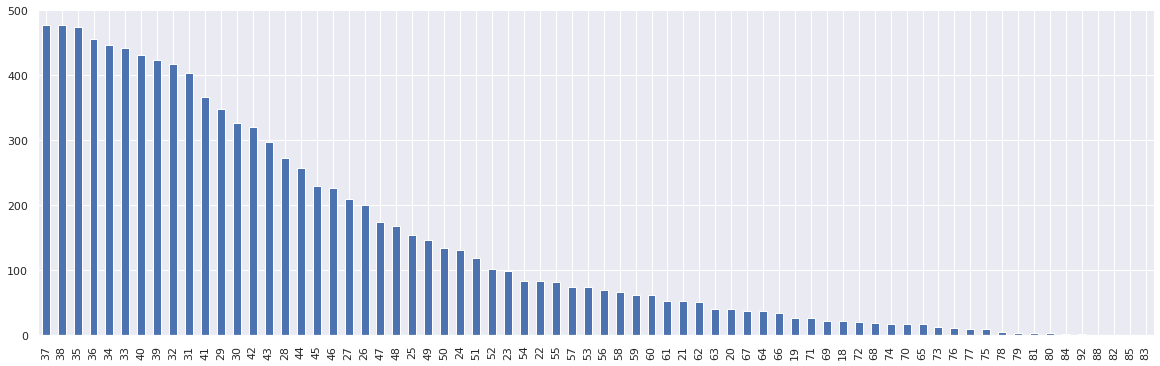

In [94]:
bankdata["Age"].value_counts().plot.bar(figsize=(20,6))

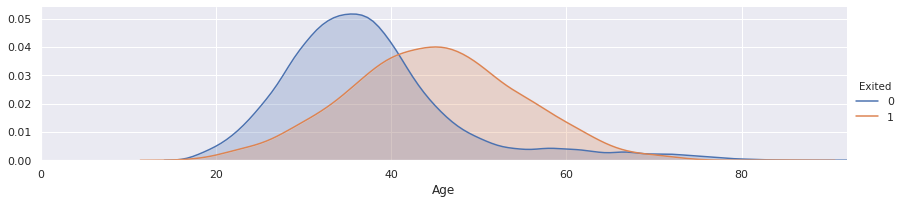

In [95]:
facet = sns.FacetGrid(bankdata, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, bankdata["Age"].max()))
facet.add_legend()

plt.show()

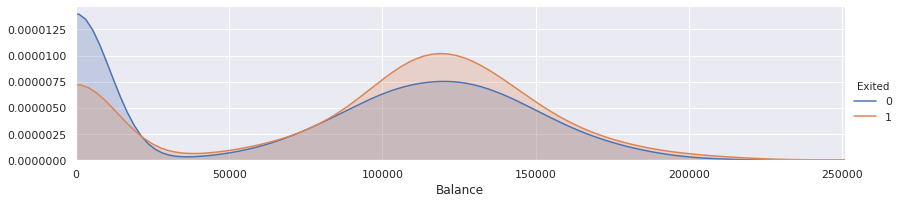

In [96]:
facet = sns.FacetGrid(bankdata, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, bankdata["Balance"].max()))
facet.add_legend()

plt.show()

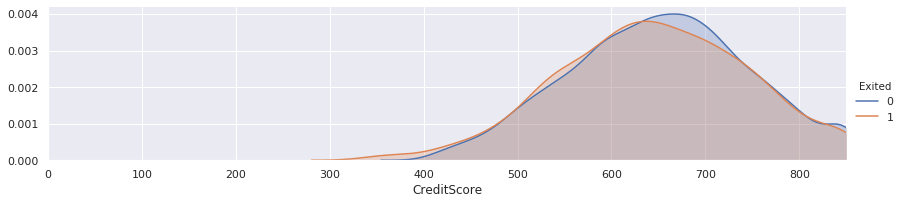

In [97]:
facet = sns.FacetGrid(bankdata, hue="Exited",aspect=4)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, bankdata["CreditScore"].max()))
facet.add_legend()

plt.show()

### Detecting Outliers using Tukey Boxplot

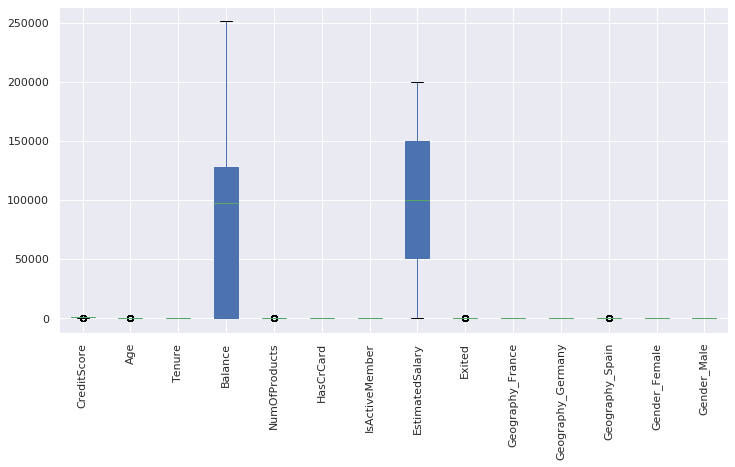

In [98]:
plt.figure(figsize=(12,6))
bplot = bankdata.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

### Detecting Outlier by hand

In [0]:
# detecting Outlier

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
        
    return flag

In [100]:
for i in range(len(bankdata.columns)):
    if(detect_outlier(bankdata[bankdata.columns[i]])):
        print(bankdata.columns[i])

CreditScore
Age
NumOfProducts
Exited
Geography_Spain


### Remove Outliers

In [0]:
def remove_outlier(feature):
    first_q = np.percentile(bankdata[feature], 25)
    third_q = np.percentile(bankdata[feature], 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    
    mean = bankdata[feature].median()
    
    bankdata.loc[bankdata[feature] < minimum, feature] = mean
    bankdata.loc[bankdata[feature] > maximum, feature] = mean

In [0]:
outliers = ["CreditScore", "Age", "NumOfProducts"]

for i in range(len(outliers)):
    remove_outlier(outliers[i])

### Checking Correlation

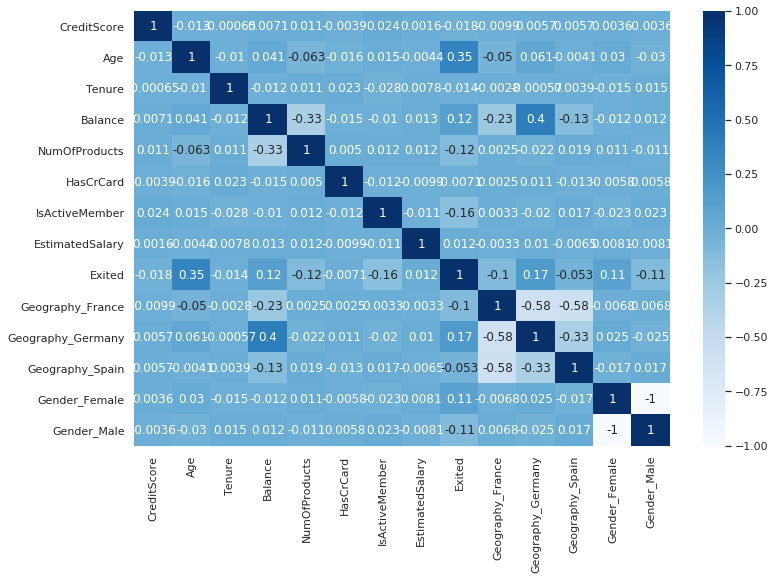

In [103]:
plt.subplots(figsize=(12,8))
sns.heatmap(bankdata.corr(), annot=True, cmap="Blues")
plt.show()

## Prediction with ML models:

In [0]:
X = bankdata.iloc[:, bankdata.columns != "Exited"]
y = bankdata["Exited"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Prediction with Gaussian Naive Bayes Model

In [106]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = accuracy_score(pred, y_test)
score = score * 100
print("Score =", score)

Score = 80.5


### Prediction with Logistic Regression Model

In [107]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8

### Prediction with Decision Tree Model

In [108]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.786

### Prediction with Random Forest Model

In [109]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8595

### Prediction with Extra Gradient Boosting Tree Model

In [110]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.84

### Feature Scaling

In [0]:
scaler = MinMaxScaler() 

bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [112]:
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
1,0.505353,0.545455,2,0.000000,1.0,1,1,0.506733,1,0,0,1,0
2,0.481799,0.522727,1,0.334031,1.0,0,1,0.562708,0,0,1,1,0
3,0.254818,0.545455,8,0.636356,3.0,1,0,0.569654,1,0,0,1,0
4,0.676660,0.477273,1,0.000000,2.0,0,0,0.469120,1,0,0,1,0
5,1.000000,0.568182,2,0.500245,1.0,1,1,0.395403,0,0,1,1,0


### Over Sampling

In [113]:
X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [114]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy%", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy% 89.61079723791589
Precision: 0.9158512720156555
Recall: 0.8742216687422167
F1: 0.8945524052245938
Area under precision (AUC) Recall: 0.864059412777492


In [115]:
# Confusion Matrix

confusion_matrix(y_test, y_pred)

array([[1451,  129],
       [ 202, 1404]])

**Prediction with NN**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [0]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [119]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 13), (8000,)
testing shapes: (2000, 13), (2000,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
# Initializing the ANN
classifier = Sequential()

In [0]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1))

In [0]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

### Adding the output layer
#### The breakdown of the inputs for the output layer is as follows:

*activiation*: **sigmoid** becasue we are in an output layer. uses the Sigmoid activation function for $\phi$. This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.  

`units`: `6` nodes (number of nodes in hidden layer). Can think of this as number of nodes are in the next layer.

`input_dim`: `11` because we span 11 dimensions in our input layer. This is needed for the first added layer. The subsequent layers's input dimensions can be inferred using the previously added layer's output dimension. The next hidden layer will know what to expect.

In [0]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

### If we want more than two categories, then we will need to change 

 1) the *units* parameter to match the desired category count
 
 2) the *activation* field to **softmax**.  Basically a sigmoid function but applied to a dependent variable that has more than 2 categories.

In [125]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 84        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_7 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


## Compiling the Neural Network
Basically applying Stochastic Gradient descent on the whole Neural Network. We are Tuning the individual weights on each neuron.

#### The breakdown of the inputs for compiling is as follows:

`optimizer`: `adam` The algorithm we want to use to find the optimal set of weights in the neural networks.  Adam is a very efficeint variation of Stochastic Gradient Descent.

`loss`: `binary_crossentropy` This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is `Binary`, it is `binary_crossentropy`. If `Categorical`, then it is called `categorical_crossentropy`

`metrics`: `[accuracy]` The accuracy metrics which will be evaluated(minimized) by the model. Used as accuracy criteria to imporve model performance. 

In [0]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

## Fitting the Neural Network
This is where we will be fitting the NN to our training set.

#### The breakdown of the inputs for compiling is as follows:

`X_train` The independent variable portion of the data which needs to be fitted with the model.

`Y_train` The output portion of the data which the model needs to produce after fitting.

`batch_size`:  How often we want to back-propogate the error values so that individual node weights can be adjusted. 

`epochs`: The number of times we want to run the entire test data over again to tune the weights. This is like the fuel of the algorithm. 


`validation_split`: `0.2` The fraction of data to use for validation data. 


In [127]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
 - 1s - loss: 0.5601 - acc: 0.7843 - val_loss: 0.5232 - val_acc: 0.7950
Epoch 2/200
 - 0s - loss: 0.5190 - acc: 0.7961 - val_loss: 0.4990 - val_acc: 0.7950
Epoch 3/200
 - 0s - loss: 0.5004 - acc: 0.7961 - val_loss: 0.4866 - val_acc: 0.7950
Epoch 4/200
 - 0s - loss: 0.4917 - acc: 0.7961 - val_loss: 0.4727 - val_acc: 0.7950
Epoch 5/200
 - 0s - loss: 0.4844 - acc: 0.7961 - val_loss: 0.4656 - val_acc: 0.7950
Epoch 6/200
 - 0s - loss: 0.4777 - acc: 0.7961 - val_loss: 0.4578 - val_acc: 0.7950
Epoch 7/200
 - 0s - loss: 0.4723 - acc: 0.7961 - val_loss: 0.4514 - val_acc: 0.7950
Epoch 8/200
 - 0s - loss: 0.4657 - acc: 0.7961 - val_loss: 0.4459 - val_acc: 0.7950
Epoch 9/200
 - 0s - loss: 0.4657 - acc: 0.7961 - val_loss: 0.4400 - val_acc: 0.7950
Epoch 10/200
 - 0s - loss: 0.4610 - acc: 0.7961 - val_loss: 0.4344 - val_acc: 0.7950
Epoch 11/200
 - 0s - loss: 0.4566 - acc: 0.7961 - val_loss: 0.4319 - val_acc: 0.7950
Epoch 12/200
 - 0s - loss: 

The output network should converge to an accuracy of around 85%
## Testing the NN
### Predicting the Test set results

This shows the probability of a customer leaving given the testing data. Each row in X_test corresponds to a row in Y_test

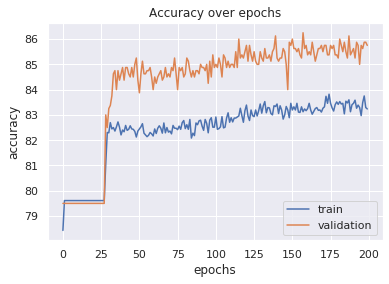

In [128]:
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [129]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.314804  ]
 [0.27209243]
 [0.14088869]
 [0.06718057]
 [0.18362218]]


**Predict the results using 0.5 as a threshold.**

In [130]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


**Printing the accuracy score and the Confusion Matrix**

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1525   70]
 [ 246  159]]


In [132]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of test data about the customers leaving the bank is classified correctly')

84.2 % of test data about the customers leaving the bank is classified correctly


### Prediction with Neural Network 

In [0]:
from keras.models import Sequential
from keras.layers import Dense

clf = Sequential()

clf.add(Dense(units = 60, kernel_initializer = "uniform", activation= "relu", input_dim=13))
clf.add(Dense(units = 60, kernel_initializer = "uniform", activation= "relu"))
clf.add(Dense(units = 60, kernel_initializer = "uniform", activation= "relu"))
clf.add(Dense(units = 1, kernel_initializer = "uniform", activation= "sigmoid"))

clf.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])

clf.fit(X_train, y_train, batch_size = 10, epochs=200)

Epoch 1/200
8000/8000 [==============================] - 2s 195us/step - loss: 0.4689 - acc: 0.8001
Epoch 2/200
8000/8000 [==============================] - 1s 141us/step - loss: 0.4252 - acc: 0.8210
Epoch 3/200
8000/8000 [==============================] - 1s 141us/step - loss: 0.4168 - acc: 0.8261
Epoch 4/200
8000/8000 [==============================] - 1s 140us/step - loss: 0.4136 - acc: 0.8270
Epoch 5/200
8000/8000 [==============================] - 1s 138us/step - loss: 0.4110 - acc: 0.8280
Epoch 6/200
8000/8000 [==============================] - 1s 141us/step - loss: 0.4051 - acc: 0.8314
Epoch 7/200
8000/8000 [==============================] - 1s 140us/step - loss: 0.4062 - acc: 0.8324
Epoch 8/200
8000/8000 [==============================] - 1s 143us/step - loss: 0.4024 - acc: 0.8306
Epoch 9/200
8000/8000 [==============================] - 1s 140us/step - loss: 0.3950 - acc: 0.8322
Epoch 10/200
8000/8000 [==============================] - 1s 138us/step - loss: 0.3913 - acc: 0.8342

In [0]:
pred = clf.predict(X_test)
#accuracy_score(pred, y_test)
accuracy_score(y_test, pred.round())

In [0]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])